In [33]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    print(base)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

data = np.load("../data/critical_zoom.npz")
print(data.files)
alphas = data["Alphas"]
betas = data["Betas"]
gammas = data["Gammas"]
match = data["match"]
n_crossings = data["n_crossings"]

['Alphas', 'Betas', 'Gammas', 'match', 'Q', 'n_crossings']


In [2]:
tol = 0.25
Q = data["Q"]
c = np.logical_and(match<=1+tol, match>=1-tol)

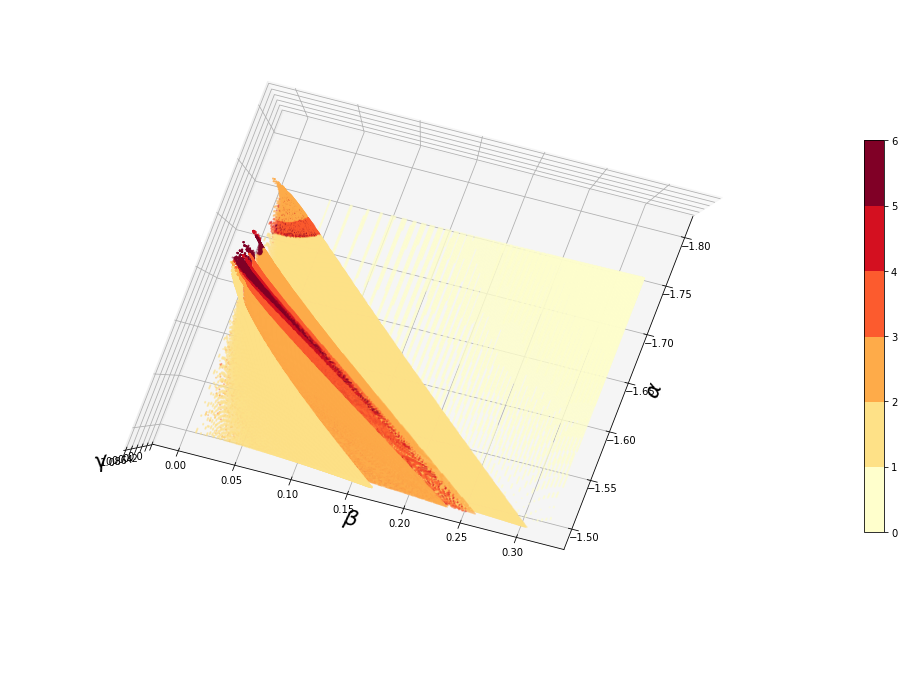

In [75]:
fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection='3d')
sc = ax.scatter(xs=alphas[c].flatten(),ys=betas[c].flatten(),zs=gammas[c].flatten(),
           s=15,c=n_crossings[c].flatten(),
           cmap=discrete_cmap(6,'YlOrRd'),vmin=0,vmax=6,
           marker='.',linewidth=0,alpha=0.5)
sc = ax.scatter(xs=[-1.8,-1.8],ys=[0.1,0.1],zs=[0.1,0.1],
           s=100,c=[1,1],
           cmap=discrete_cmap(6,'YlOrRd'),vmin=0,vmax=6,
           marker='.',linewidth=0,alpha=1.0)
fig.colorbar(sc,shrink=0.6)
sc.remove()
ax.view_init(89, 17.5)
ax.set_xlabel(r'$\alpha$',fontsize=22)
ax.set_ylabel(r'$\beta$',fontsize=22)
ax.set_zlabel(r'$\gamma$',fontsize=22)

plt.savefig('nonzero_3d_regime.png',bbox_inches='tight',dpi=400)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection='3d')
sc = ax.scatter(xs=alphas[c].flatten(),ys=betas[c].flatten(),zs=gammas[c].flatten(),
           s=15,c=Q[c].flatten(),cmap=plt.get_cmap('viridis'),marker='.',linewidth=0,alpha=0.5)
ax.view_init(40, 17.5)
ax.set_xlabel(r'$\alpha$',fontsize=22)
ax.set_ylabel(r'$\beta$',fontsize=22)
ax.set_zlabel(r'$\gamma$',fontsize=22)
plt.colorbar(sc)

plt.savefig('nonzero_3d_regime_Q-color.png',bbox_inches='tight',dpi=400)

# Zooming in

In [ ]:
data = np.load("data/critical_zoom.npz")
print(data.files)
alphas = data["Alphas"]
betas = data["Betas"]
gammas = data["Gammas"]
match = data["match"]

In [ ]:
tol = 0.25
Q = data["Q"]
c = np.logical_and(match<=1+tol, match>=1-tol)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection='3d')
ax.scatter(xs=alphas[c].flatten(),ys=betas[c].flatten(),zs=gammas[c].flatten(),
           s=15,c=Q[c].flatten(),cmap=plt.get_cmap('viridis'),marker='.',linewidth=0,alpha=0.5)
ax.view_init(89, 17.5)
ax.set_xlabel(r'$\alpha$',fontsize=22)
ax.set_ylabel(r'$\beta$',fontsize=22)
ax.set_zlabel(r'$\gamma$',fontsize=22)
plt.colorbar(sc)

plt.savefig('nonzero_3d_regime_zoom.png',bbox_inches='tight',dpi=400)

# Shooting method at 1D slice & higher modes

#### Uniform PV

$r=0.6$

$\alpha = -\frac{1}{2}(1+\frac{2}{r}) = -2.167$

$\gamma = 0.5$

In [ ]:

data_1d = np.load("data/critical_1d_uniform_PV.npz")
print(data.files)
betas_1d = data_1d["betas"]
match_1d = data_1d["match"]

tol=0.25
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.fill_between([0,1],[1-tol,1-tol],[1+tol,1+tol],color="lightgrey")
plt.plot(betas_1d,match_1d,"r.",markersize=1,alpha=0.1)
plt.ylim([-5,5])
plt.xlim([0,1])
plt.xlabel(r'$\beta$')

plt.subplot(1,2,2)
plt.fill_between([0,1],[1-tol,1-tol],[1+tol,1+tol],color="lightgrey")
plt.plot(betas_1d,match_1d,"r.",markersize=1,alpha=0.1)
plt.ylim([0.5,1.5])
plt.xlim([0.65,0.75])
plt.xlabel(r'$\beta$')

plt.savefig('zeroPV_1d_regime.png',bbox_inches='tight',dpi=400)

#### Non-uniform PV

$r=0.6$

$\alpha = -\frac{1}{2}(1+\frac{2}{r}) = -1.65$

$\gamma = 0.5$

In [ ]:

data_1d = np.load("data/critical_1d_nonuniform_PV.npz")
print(data.files)
betas_1d = data_1d["betas"]
match_1d = data_1d["match"]

tol=0.25
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.fill_between([0,1],[1-tol,1-tol],[1+tol,1+tol],color="lightgrey")
plt.plot(betas_1d,match_1d,"r.",markersize=1)
plt.ylim([-5,5])
plt.xlim([0,1])
plt.xlabel(r'$\beta$')

plt.subplot(1,2,2)
plt.fill_between([0,1],[1-tol,1-tol],[1+tol,1+tol],color="lightgrey")
plt.plot(betas_1d,match_1d,"r.",markersize=1)
plt.ylim([-2,2])
plt.xlim([0,0.05])
plt.xlabel(r'$\beta$')

plt.savefig('nonzeroPV_1d_regime.png',bbox_inches='tight',dpi=400)